# **Ejercicio 2: Procesamiento de datos de vuelos con Apache Spark**

1.Descargar un dataset de vuelos

2.Cargar los datos en un DataFrame de Spark.

3.Calcular el retraso promedio en la llegada de vuelos para un aeropuerto en específico.

4.Encontrar las 10 rutas de vuelo más populares (pares origen-destino con mayor número de vuelos).

Portal de Datos Abiertos del Gobierno de EE. UU.:
#https://www.transtats.bts.gov/Homepage.asp

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

carpeta = "/content/drive/MyDrive/Data Engineering Test"
os.chdir(carpeta)
print("Directorio actual:", os.getcwd())
print("Archivos en la carpeta:", os.listdir())


Mounted at /content/drive
Directorio actual: /content/drive/MyDrive/Data Engineering Test
Archivos en la carpeta: ['Teoria.ipynb', 'ejercicio 4.ipynb', 'Ejercicio3.ipynb', 'time_series_covid19_confirmed_global.csv', 'time_series_covid19_deaths_global.csv', 'Ejercicio 1.ipynb', 'T_ONTIME_REPORTING2025.csv', 'ejercicio2 vuelos.ipynb']


Instalar paquetes

In [2]:
!pip install pyspark
!pip install findspark

Importar Librerias e iniciar una sesion de spark

In [16]:
import findspark
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
import seaborn as sns
import sys
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
from datetime import datetime
spark = SparkSession.builder.appName("prueba2").getOrCreate()
print(f"Versión de Python: {sys.version}")
print(f"Se cargaron las librerias {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Versión de Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Se cargaron las librerias 2025-09-06 06:02:14


Cargar datos desde Google Drive

In [17]:
ruta_csv = "T_ONTIME_REPORTING2025.csv"
vuelos = spark.read.csv(ruta_csv, header=True, inferSchema=True)

print("Número de filas:", vuelos.count())
print("Número de columnas:", len(vuelos.columns))

Número de filas: 469968
Número de columnas: 23


Normalizar nombres de columnas (snake_case)

In [18]:
vuelos = vuelos.toDF(*[c.lower().replace(" ", "_") for c in vuelos.columns])
print(vuelos.columns)

['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id', 'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_nm', 'dest_airport_id', 'dest_airport_seq_id', 'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_nm', 'dep_delay', 'arr_delay', 'arr_delay_new', 'flights']


Limpiar datos y mostrar primeras 10 filas de vuelos con retraso en la llegada

In [19]:
vuelos_filtrados = vuelos.filter((col("arr_delay").isNotNull()) & (col("arr_delay") > 0))
vuelos_filtrados.limit(10).toPandas()
display(vuelos_filtrados.limit(10).toPandas())

,year,month,day_of_month,day_of_week,fl_date,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,...,dest_airport_seq_id,dest_city_market_id,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,arr_delay_new,flights
0,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1082103,30852,BWI,"Baltimore, MD",MD,Maryland,73.0,43.0,43.0,1.0
1,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1125903,30194,DAL,"Dallas, TX",TX,Texas,0.0,3.0,3.0,1.0
2,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1125903,30194,DAL,"Dallas, TX",TX,Texas,20.0,19.0,19.0,1.0
3,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1125903,30194,DAL,"Dallas, TX",TX,Texas,34.0,35.0,35.0,1.0
4,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1125903,30194,DAL,"Dallas, TX",TX,Texas,35.0,39.0,39.0,1.0
5,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1125903,30194,DAL,"Dallas, TX",TX,Texas,70.0,66.0,66.0,1.0
6,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1129202,30325,DEN,"Denver, CO",CO,Colorado,2.0,24.0,24.0,1.0
7,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1129202,30325,DEN,"Denver, CO",CO,Colorado,97.0,99.0,99.0,1.0
8,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,Texas,-2.0,36.0,36.0,1.0
9,2015,1,1,4,1/1/2015 12:00:00 AM,10140,1014003,30140,ABQ,"Albuquerque, NM",...,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,Texas,14.0,13.0,13.0,1.0


Retraso promedio en aeropuerto

In [23]:
aeropuerto = "ATL"
promedio_retraso = vuelos_filtrados.filter(vuelos_filtrados.dest == aeropuerto)\
                                   .agg(avg("arr_delay").alias("promedio_retraso_minutos"))
promedio_retraso.show(truncate=False)

# promedio en horas
promedio_retraso_horas = promedio_retraso.select((col("promedio_retraso_minutos")/60).alias("promedio_retraso_horas"))
promedio_retraso_horas.show(truncate=False)

+------------------------+
|promedio_retraso_minutos|
+------------------------+
|32.080888888888886      |
+------------------------+

+----------------------+
|promedio_retraso_horas|
+----------------------+
|0.5346814814814814    |
+----------------------+



Top 10 rutas de vuelo más populares (pares de aeropuertos) en
términos de la cantidad de vuelos.

,ruta,num_vuelos
0,LAX → JFK,433
1,OGG → HNL,408
2,LAS → LAX,380
3,LAX → SFO,379
4,SFO → LAX,375
5,LAX → PHX,367
6,ORD → LGA,364
7,LAX → LAS,348
8,HNL → OGG,339
9,ATL → LGA,325


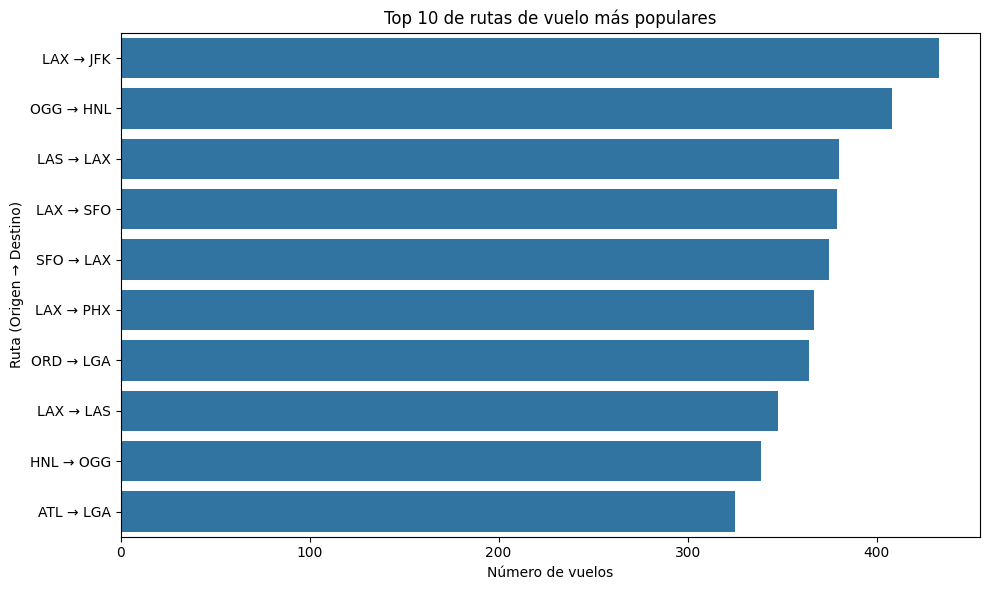

In [25]:
#Calcular las 10 rutas más populares origen → destino
rutas_populares = vuelos_filtrados.groupBy("origin", "dest") \
                                  .agg(count("*").alias("num_vuelos")) \
                                  .orderBy(desc("num_vuelos")) \
                                  .limit(10)

#Convertir a Pandas para su visualización
rutas_pd = rutas_populares.toPandas()
rutas_pd["ruta"] = rutas_pd["origin"] + " → " + rutas_pd["dest"]

#Mostrar la tabla
display(rutas_pd[["ruta", "num_vuelos"]])

#Graficar
plt.figure(figsize=(10,6))
sns.barplot(x="num_vuelos", y="ruta", data=rutas_pd)
plt.title("Top 10 de rutas de vuelo más populares")
plt.xlabel("Número de vuelos")
plt.ylabel("Ruta (Origen → Destino)")
plt.tight_layout()
plt.show()